In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import folium

In [48]:
def dibjuar_mapa(df_draw: pd.DataFrame, col_target: str, circle: bool):
  """Dibujar un mapa para identificar localización de ciertos puntos
  y dibujar sobre ellos objetos que identifiquen alguna otra variable
  relacionada a esos puntos, ejemplo: col_target"""

  mapa = folium.Map(location=[-38.951678, -68.059189], zoom_start=13) # Localizar en Neuquén Capital
  map_color = ['green','red','orange']
  # Agregamos los puntos de las localidades
  for index, row in df_draw.iterrows():
      folium.Marker([row['lat'], row['lon']], popup=row['Ecopunto']).add_to(mapa)

  if circle:
    # Agregamos elementos dado el valor de cada variable de interés
    for i, col in enumerate(list(df_draw[col_target].unique())):

      for index, row in df_draw.loc[df_draw[col_target]==col].iterrows():
          folium.Circle(
              location=[row['lat'], row['lon']],
              radius=136,
              popup=row[col_target], # para que aparezca como detalle al hacer click en alguna de las burbujas
              fill=True,
              fill_opacity=0.7,
              color=map_color[i]
          ).add_to(mapa)


  # Agregamos una capa de control al mapa
  folium.LayerControl().add_to(mapa)

  return mapa

In [47]:
def dibjuar_mapa_con_dist(df_draw: pd.DataFrame, col_target: str, circle: bool):
  """Dibujar un mapa para identificar localización de ciertos puntos
  y dibujar sobre ellos otros objetos"""

  mapa = folium.Map(location=[-38.951678, -68.059189], zoom_start=13) # Localizar en Neuquén Capital
  map_color = ['green','red','orange']
  # Agregamos los puntos de las localidades
  for index, row in df_draw.iterrows():
      folium.Marker([row['lat'], row['lon']], popup=row['Ecopunto']).add_to(mapa)

  if circle:
    # Agregamos elementos dado el valor de cada variable de interés
    for i, col in enumerate(list(df_draw[col_target].unique())):
      for index, row in df_draw.loc[df_draw[col_target]==col].iterrows():
          folium.Circle(
              location=[row['lat'], row['lon']],
              radius=500,
              popup='500m', # para que aparezca como detalle al hacer click en alguna de las burbujas
              fill=True,
              fill_opacity=0.3,
              color='blue'
          ).add_to(mapa)


  # Agregamos una capa de control al mapa
  folium.LayerControl().add_to(mapa)

  return mapa

# Análisis

Fecha de relevamiento: 29/09/2023 - 11/10/2023

Muchos ecopuntos recolecatban sólo material plástico, por ejemplo botellas. No los usaba la gente en general, si no las personas encargadas del lugar

In [5]:
df = pd.read_csv('drive/MyDrive/AnalisisDeDatos/df_cleanedv2.csv')

In [6]:
print('Total de ecopuntos relevados: ', df.shape[0])

Total de ecopuntos relevados:  22


In [7]:
#df.head()

# Estado actual de los ecopuntos

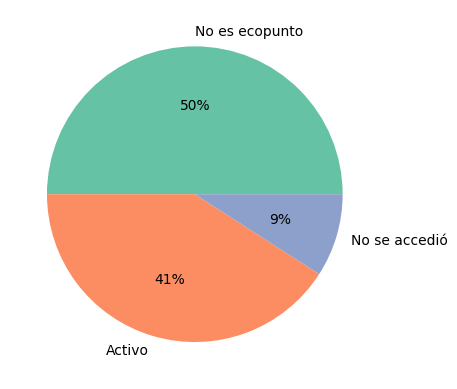

In [8]:
data = df['Estado actual'].value_counts().values
labels = df['Estado actual'].value_counts(normalize=True).index
colors = sns.color_palette('Set2')

plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')#, explode = explode)
plt.show()

In [9]:
dibjuar_mapa(df, 'Estado actual', circle=True)

¿Qué onda YPF PETRO OESTE??

**Interacción**  
Acercar por si no se ven los ecopuntos. Hacer click en la burbuja para ver el estado actual del ecopunto, y en el coso azul para ver el nombre del ecopunto.


**Código de colores:**  
Verde: Activos  
Rojos: No es ecopunto  
Naranja: No se accedió (no se pudo ver ningún ecopunto)

En el mapa podemos ver que los ecopuntos activos se encuentran en su mayor parte en la zona norte de la ciudad de Neuquén.

In [10]:
# df.loc[df['Estado actual']=='No se accedió']

De los que no se accedieron, el tribunal de faltas se encontraba cerrado a la hora que fuimos (entre las 17 y 18 horas) al igual que la Comisión vecinal Barrio Huiliches. En ningún caso se pudo encontrar un ecopunto visible.

Accesibilidad

In [11]:
df_acc = df.loc[df['Estado actual']=='Activo']

In [12]:
# df_acc.shape

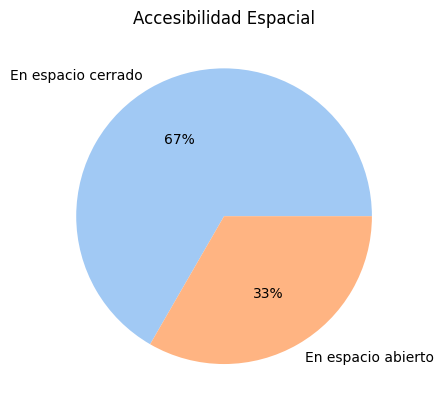

In [13]:
data = df_acc['Accesibilidad espacial'].value_counts().values
labels = df_acc['Accesibilidad espacial'].value_counts(normalize=True).index
colors = sns.color_palette('pastel')

plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')#, explode = explode)
plt.title('Accesibilidad Espacial')
plt.show()

In [14]:
# df_acc.loc[df_acc['Accesibilidad espacial']=='En espacio cerrado']

In [15]:
# df_acc.loc[df_acc['Accesibilidad espacial']=='En espacio cerrado'].loc[6,'Accesibilidad temporal']

De los 9 ecopuntos que se encontraban activos, el 67% se encontraba en un espacio cerrado, es decir, había algún elemento de por medio que impedía el libre acceso: dentro de algún edificio, cercados con algún portón.

El caso más extremo fue sin duda el de ALTO COMAHUE SHOPPING que se encontraba en el subsuelo donde se encuentra el estacionamiento, escondido atrás de una pared. Tuvimos que preguntar al menos a dos guardias en distintos puntos del shopping para saber dónde se ubicaba el ecopunto.

Por otro lado, muchos de ellos eran utilizados en su mayoría por personas que atendían el lugar. Y sólo funcionaba cuando ese lugar se encontraba abierto o habían eventos deportivos.


In [16]:
# df_acc.loc[df_acc['Accesibilidad espacial']=='En espacio abierto']

In [17]:
df_espacio = df_acc.loc[df_acc['Accesibilidad espacial']=='En espacio cerrado']

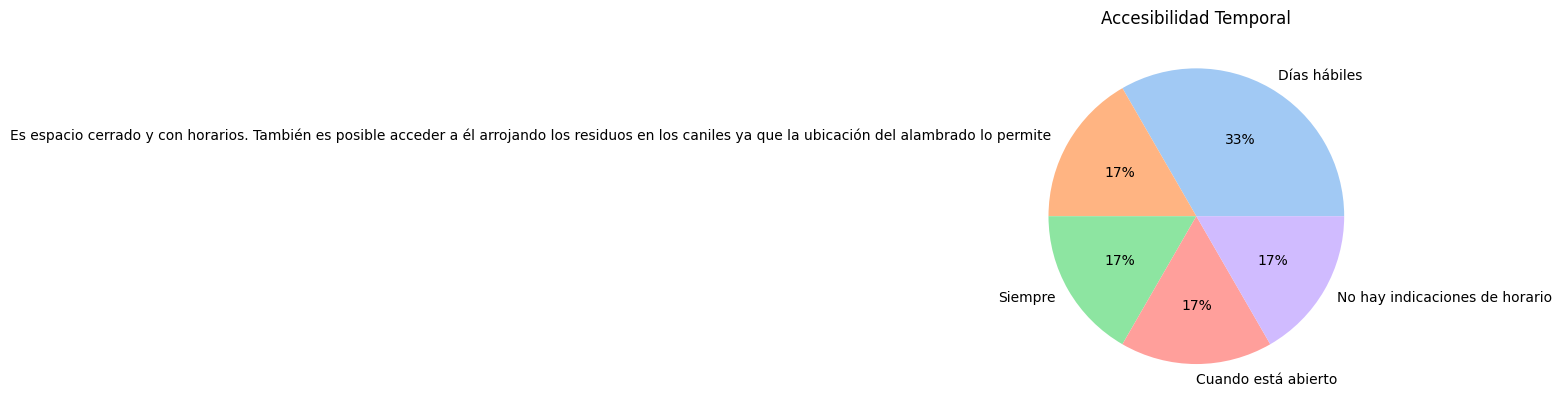

In [18]:
data = df_espacio['Accesibilidad temporal'].value_counts().values
labels = df_espacio['Accesibilidad temporal'].value_counts(normalize=True).index
colors = sns.color_palette('pastel')

plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')#, explode = explode)
plt.title('Accesibilidad Temporal')
plt.show()

Con respecto a la accesibilidad temporal de los ecopuntos que se encuentran en espacio cerrado, muchos se encuentran con horarios. Es decir que no están disponibles todo el tiempo. Y el que dice Siempre es el ALTO COMAHUE SHOPPING, que a pesar de estar siempre abierto, se encuentra inaccesible.

Además, algunos no tenían indicaciones de horarios ni siquiera.

**Determinando la accesibilidad**

In [19]:
temp_in = ['Días hábiles','Cuando está abierto','No hay indicaciones de horario','Siempre']

In [20]:
df_acc = df_acc.reset_index(drop=True)

In [21]:
cond = [(df_acc['Accesibilidad espacial']=='En espacio cerrado') & (df_acc['Accesibilidad temporal'].isin(temp_in)),
        (df_acc['Accesibilidad espacial']=='En espacio cerrado') & (df_acc['Accesibilidad temporal'] == 'Es espacio cerrado y con horarios. También es posible acceder a él arrojando los residuos en los caniles ya que la ubicación del alambrado lo permite '),
        df_acc['Accesibilidad espacial']=='En espacio abierto']
choice = ['No accesible','Medio','Accesible']
df_acc['Accesibilidad'] =  np.select(cond,choice,'warning')


Si tomamos en cuenta los casos donde los ecopuntos se encuentran en espacio cerrado y hay horarios, y adicionamos el caso más extremo en cuanto a accesibilidad espacial, obtenemos el siguiente gráfico en cuanto a accesibilidad general de los ecopuntos que se encuentran activos y que se pudieorn acceder y visualizar.

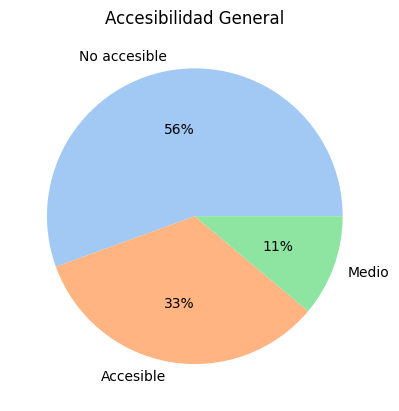

In [22]:
data = df_acc['Accesibilidad'].value_counts().values
labels = df_acc['Accesibilidad'].value_counts(normalize=True).index
colors = sns.color_palette('pastel')

plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')#, explode = explode)
plt.title('Accesibilidad General')
plt.show()

In [23]:
dibjuar_mapa(df_acc.sort_values(by=['Accesibilidad']), 'Accesibilidad', circle=True)

**Verde**: Accesible  
**Rojo**: Accesibilidad media  
Naranja: no accesible


En el mapa podemos ver que de los ecopuntos activos, sólo tres son totalmente accesibles, y se encuentran en la zona norte-oeste de la ciudad de Neuquén.

¿Queremos un sistema de reciclaje en el que la recolección de residuos sea accesible?
¿Estamos dispuestos a ser responsables?
¿Disponemos de un sistema que se encargue de la recolección eficiente?
¿A dónde se destinan estos residuos? ¿Qué es lo que se hace luego? ¿Vale la pena nuestro esfuerzo hoy en día?

# Estado de los ecopuntos

In [24]:
pd.set_option('display.max_columns',1000)

In [25]:
# df_acc.shape

Sería qué tan bien cuidado se encontraban los ecopuntos

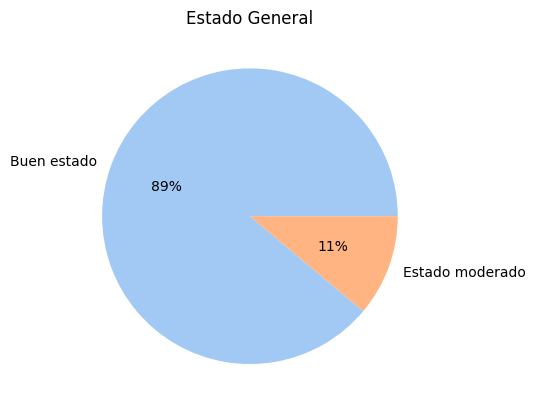

In [26]:
data = df_acc['Estado '].value_counts().values
labels = df_acc['Estado '].value_counts(normalize=True).index
colors = sns.color_palette('pastel')

plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')#, explode = explode)
plt.title('Estado General')
plt.show()

Están bastante bien

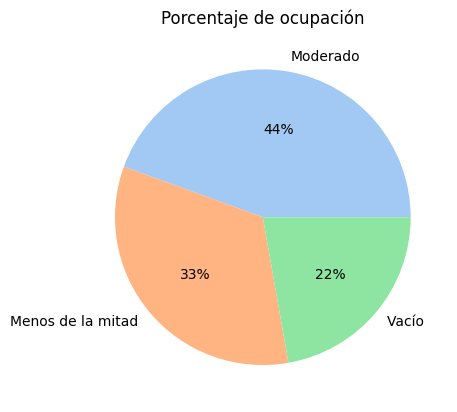

In [27]:
data = df_acc['Ocupación de los compartimentos'].value_counts().values
labels = df_acc['Ocupación de los compartimentos'].value_counts(normalize=True).index
colors = sns.color_palette('pastel')

plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')#, explode = explode)
plt.title('Porcentaje de ocupación')
plt.show()

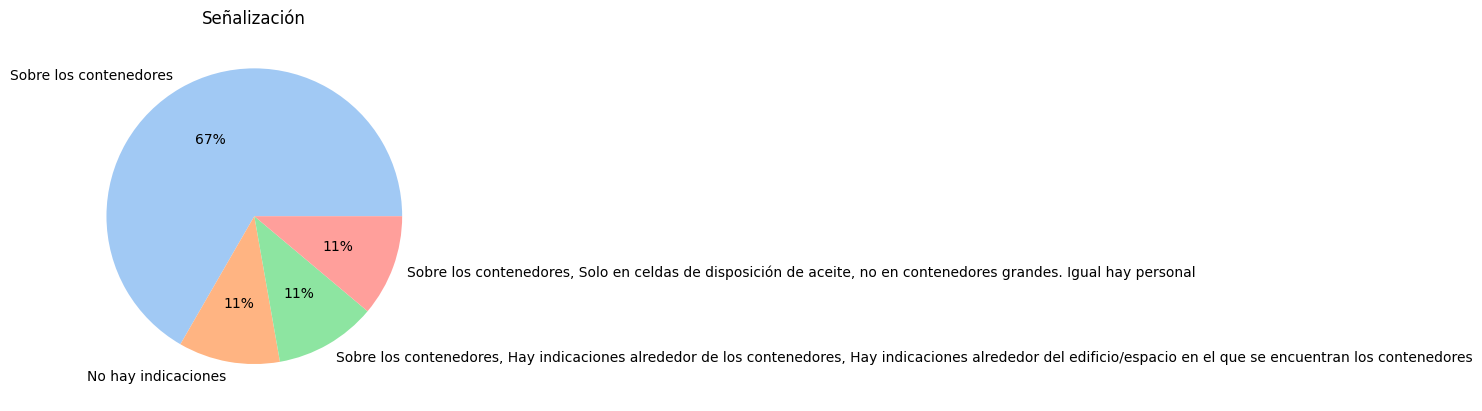

In [28]:
data = df_acc['Ubicación'].value_counts().values
labels = df_acc['Ubicación'].value_counts(normalize=True).index
colors = sns.color_palette('pastel')

plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')#, explode = explode)
plt.title('Señalización')
plt.show()

Hay alguna relación entre la señalización y la ocupación de los contenedores? y entre la señalización y la accesibilidad espacial?

**Grado de ocupación vs señalización**

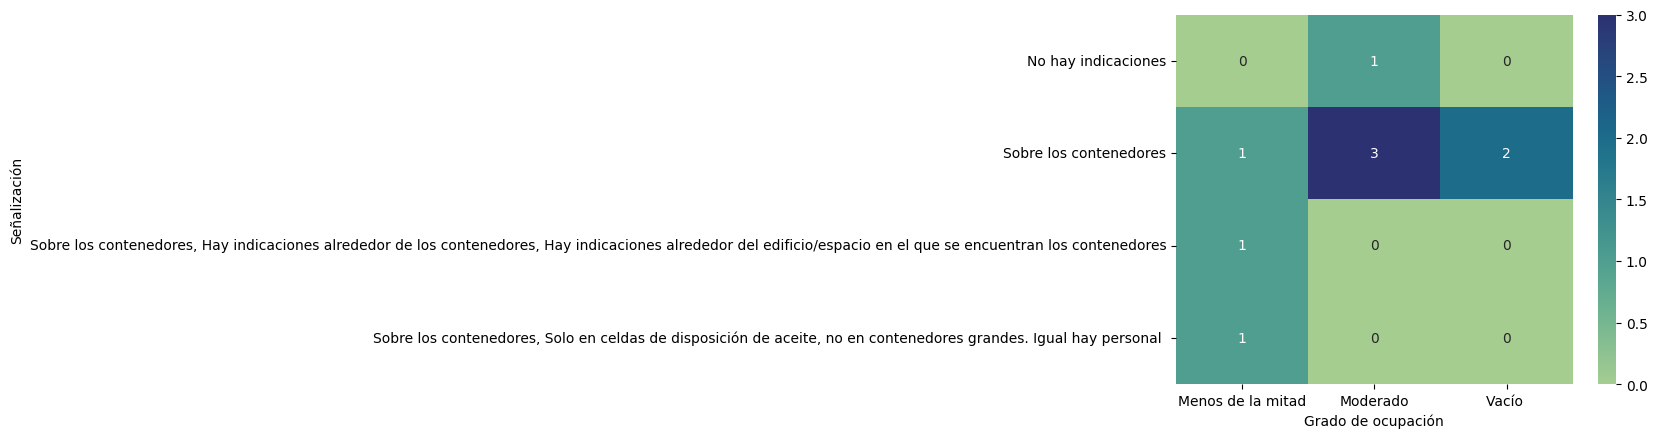

In [29]:
sen_oc = pd.crosstab(df_acc['Ubicación'], df_acc['Ocupación de los compartimentos'], rownames=['Señalización'], colnames=['Grado de ocupación'])
sns.heatmap(sen_oc, annot=True, cmap='crest')
plt.show()

**Accesibilidad espacial vs señalización**

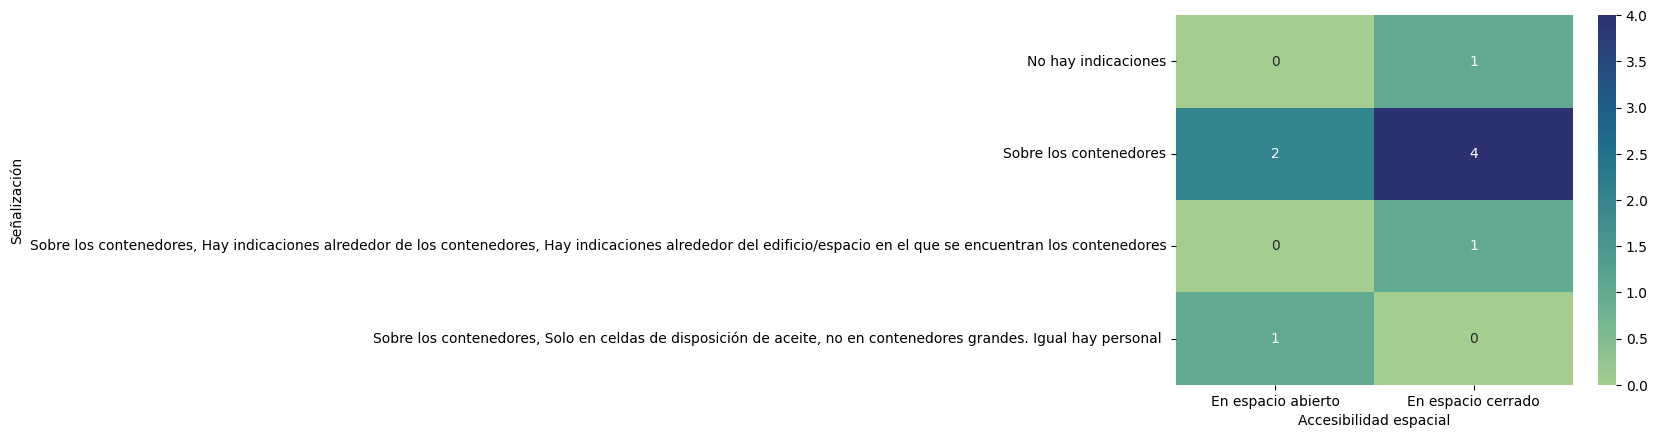

In [30]:
sen_acc = pd.crosstab(df_acc['Ubicación'], df_acc['Accesibilidad espacial'], rownames=['Señalización'], colnames=['Accesibilidad espacial'])
sns.heatmap(sen_acc, annot=True, cmap='crest')
plt.show()

Vemos que 4 ecopuntos se encuentran en espacio cerrado y sólo tienen señalización sobre los contenedores, es señalización suficiente???

# Ubicación

In [31]:
import math
def distance(source , destination):
    lat1, lon1 = source['lat'],source['lon']
    lat2, lon2 = destination['lat'],destination['lon']
    radius = 6371 # km
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    d = d*1000
    return d

In [32]:
import geopy.distance


In [33]:
dict_distance = {}
for index, point1 in df_acc.iterrows():
  for indexp, point2 in df_acc.iterrows():
    point1_row = point1[['Ecopunto','lat','lon']]
    point2_row = point2[['Ecopunto','lat','lon']]
    # print(point1_row)
    distance = np.sqrt((point1_row["lat"] - point2_row["lat"])**2 + (point1_row["lon"] - point2_row["lon"])**2)*100
    dict_distance[str(point1_row['Ecopunto']) + '_' + str(point2_row['Ecopunto'])] = distance


Distancia en kilómetros

In [34]:
df_distance = pd.DataFrame(dict_distance, index=[0])

In [35]:
df_distance = df_distance.T

In [36]:
df_distance.columns = ['distance']

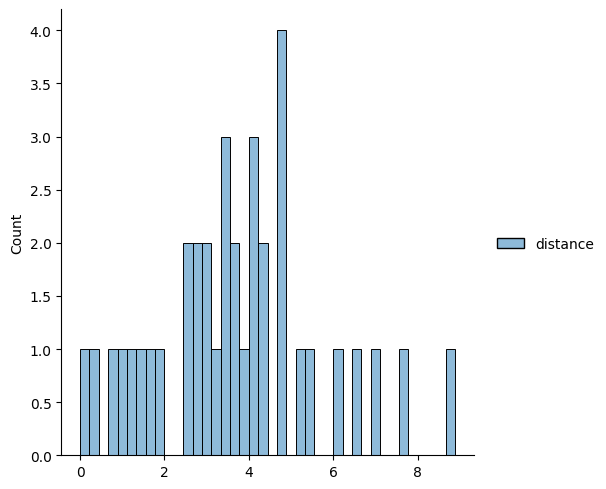

In [37]:
sns.displot(df_distance.drop_duplicates(subset='distance'), bins=40)
plt.show()

El promedio de distancias es entre 3 y 6 kilómetros

In [38]:
df_distance = df_distance.drop_duplicates(subset='distance')

## Análisis en función de las zonas de la ciudad. Identificación de conglomerados de ecopuntos.

In [39]:
cen_lat, cen_lon = [-38.951678, -68.059189]

In [40]:
map_ub = dibjuar_mapa_con_dist(df_acc.sort_values(by=['Estado actual']), 'Estado actual', circle=False)
folium.PolyLine([(-38.936416, -68.059058), (-38.979781, -68.059367)], color="red", weight=2.5, opacity=1).add_to(map_ub)
folium.PolyLine([(-38.954645, -68.132429), (-38.955469, -68.017609)], color="blue", weight=2.5, opacity=1).add_to(map_ub)

In [41]:
map_ub

In [42]:
nor_oeste = df_acc.loc[(df_acc['lat']>cen_lat )& (df_acc['lon']<cen_lon)]
nor_este = df_acc.loc[(df_acc['lat']<cen_lat) & (df_acc['lon']<cen_lon)]

sur_oeste = df_acc.loc[(df_acc['lat']>cen_lat) & (df_acc['lon']>cen_lon)]
sur_este = df_acc.loc[(df_acc['lat']<cen_lat )& (df_acc['lon']>cen_lon)]

In [43]:
nor_oeste.shape, nor_este.shape, sur_oeste.shape, sur_este.shape

((7, 21), (1, 21), (1, 21), (0, 21))

Según la localización central de la ciudad de Neuquén, hay 7 ecopuntos en la zona noroeste, 1 en la zona noreste, uno en el suroeste, y ninguno en el sureste, abarcando áreas de ... a ... km2

Si establecemos que hasta 500 metros una persona podría acercarse al ecopunto caminando..

In [44]:
map_ub_dist = dibjuar_mapa_con_dist(df_acc.sort_values(by=['Estado actual']), 'Estado actual', circle=True)
folium.PolyLine([(-38.936416, -68.059058), (-38.979781, -68.059367)], color="red", weight=2.5, opacity=1).add_to(map_ub_dist)
folium.PolyLine([(-38.954645, -68.132429), (-38.955469, -68.017609)], color="blue", weight=2.5, opacity=1).add_to(map_ub_dist)

In [45]:
map_ub_dist

Algunos ecopuntos se solapan, otros no llegan a cubrir la totalidad de la región. Los ciudadanos deben trasladarse en automóvil para acercarse al ecopunto.

In [46]:
# %%shell
# jupyter nbconvert --no-input --to html /content/drive/MyDrive/AnalisisDeDatos/AnalisisRelevamiento.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/AnalisisDeDatos/AnalisisRelevamiento.ipynb to html
[NbConvertApp] Writing 1079553 bytes to /content/drive/MyDrive/AnalisisDeDatos/AnalisisRelevamiento.html
